In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class HeatmapGenerator:
    def __init__(self, data):
        """
        Initializes the HeatmapGenerator class.

        Parameters:
        - data (pd.DataFrame): The dataset containing the data for the heatmap.
        """
        self.data = data

    def bin_scores(self, bin_size=10):
        """
        Bins the math, reading, and writing scores into intervals.

        Parameters:
        - bin_size (int, optional): The size of each bin interval (default is 10).

        Returns:
        - pd.DataFrame: The dataset with binned scores.
        """
        self.data['math_score_bins'] = pd.cut(self.data['math score'], bins=np.arange(0, 101, bin_size))
        self.data['reading_score_bins'] = pd.cut(self.data['reading score'], bins=np.arange(0, 101, bin_size))
        self.data['writing_score_bins'] = pd.cut(self.data['writing score'], bins=np.arange(0, 101, bin_size))

    def plot_normalized_heatmap(self, group_by_column, score_bin_column, title, cmap='viridis', figsize=(10, 8)):
        """
        Plots a normalized heatmap showing the relative frequency of scores for a specific grouping.

        Parameters:
        - group_by_column (str): The column by which to group (e.g., 'race/ethnicity', 'gender', 'parental level of education').
        - score_bin_column (str): The column containing binned scores (e.g., 'math_score_bins').
        - title (str): Title of the heatmap.
        - cmap (str, optional): The color map to use for the heatmap.
        - figsize (tuple, optional): Figure size of the heatmap.
        """
        # Compute the frequency of scores by group
        frequency_table = pd.crosstab(self.data[group_by_column], self.data[score_bin_column])

        # Normalize the frequency table by dividing by the row sums
        normalized_frequency_table = frequency_table.div(frequency_table.sum(axis=1), axis=0)

        # Plot the normalized heatmap
        plt.figure(figsize=figsize)
        sns.heatmap(normalized_frequency_table, annot=True, cmap=cmap, linewidths=0.5, fmt='.2f')
        plt.title(title)
        plt.xlabel('Score Bins')
        plt.ylabel(group_by_column)
        plt.show()

# Adjust the path if necessary
df = pd.read_csv('../data/exams.csv')

# Initialize HeatmapGenerator
heatmap_gen = HeatmapGenerator(data=df)

# Bin the scores
heatmap_gen.bin_scores(bin_size=10)

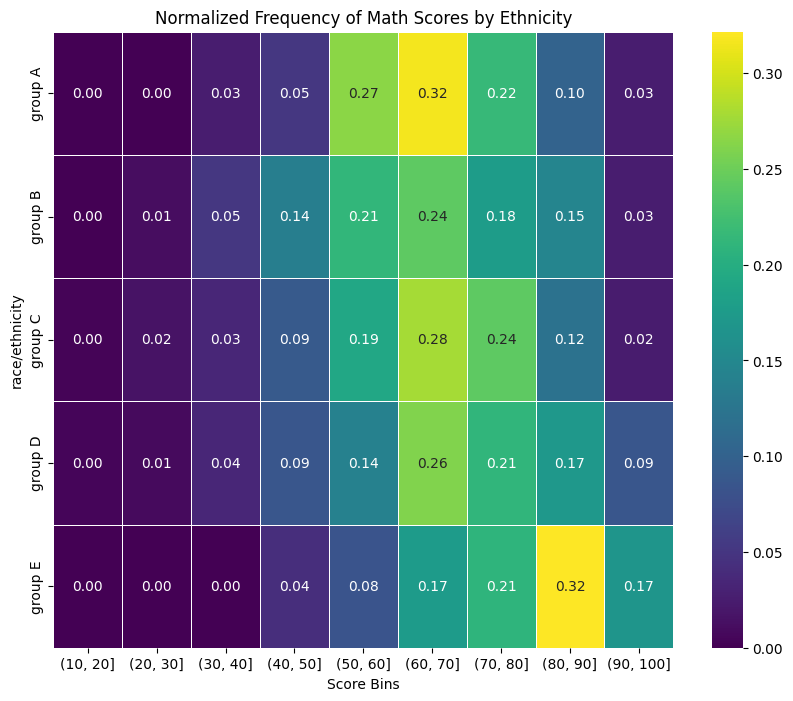

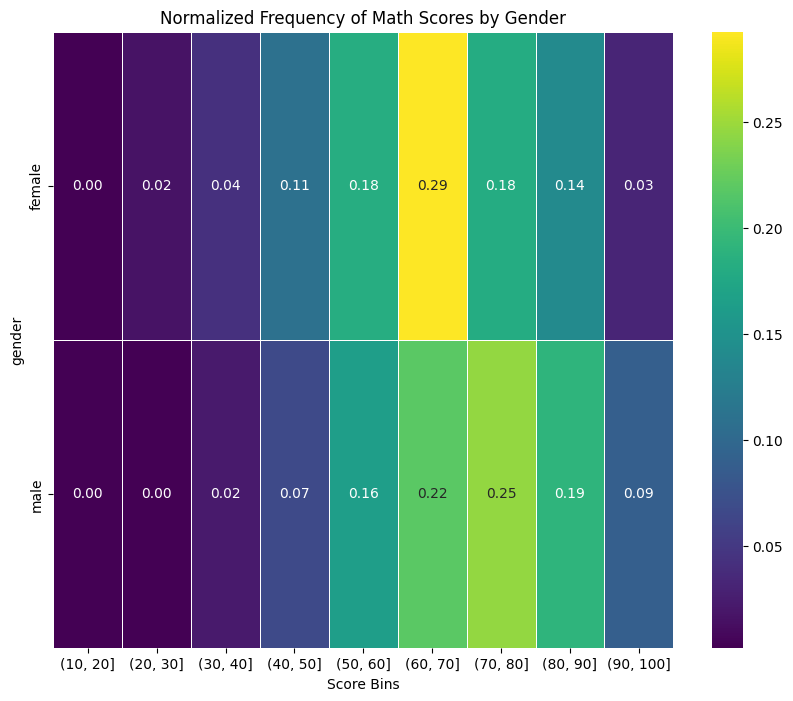

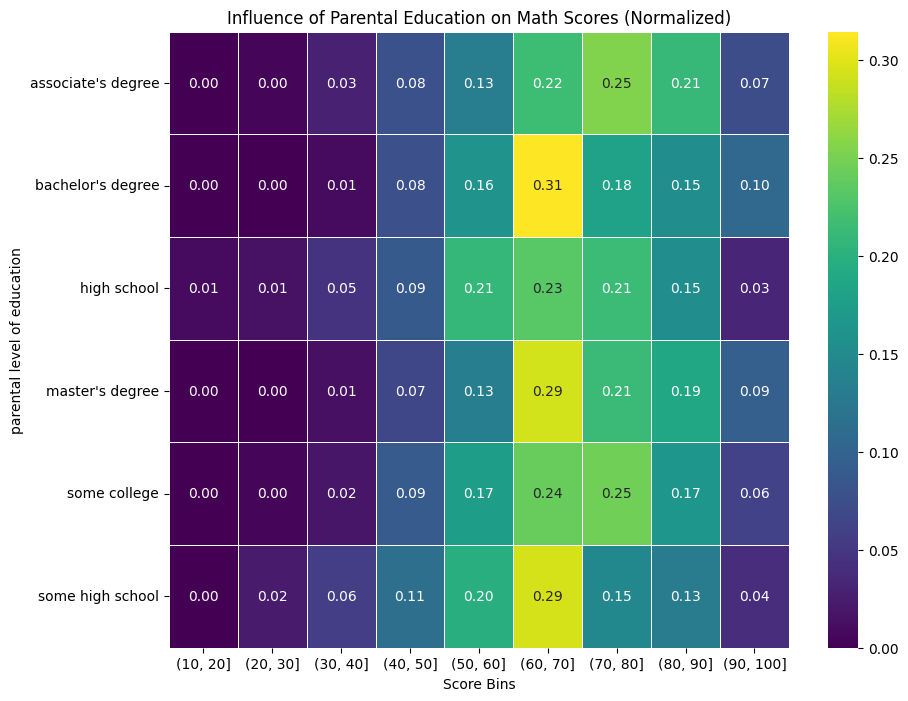

In [2]:
# Plot normalized heatmaps for different groupings
heatmap_gen.plot_normalized_heatmap(group_by_column='race/ethnicity', score_bin_column='math_score_bins', 
                                    title='Normalized Frequency of Math Scores by Ethnicity')

heatmap_gen.plot_normalized_heatmap(group_by_column='gender', score_bin_column='math_score_bins', 
                                    title='Normalized Frequency of Math Scores by Gender')

heatmap_gen.plot_normalized_heatmap(group_by_column='parental level of education', score_bin_column='math_score_bins', 
                                    title='Influence of Parental Education on Math Scores (Normalized)')